# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('/kaggle/input/dados-sinasc/dados_SINASC.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
#Verificando os tipos das variaveis

sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
# Verificando as faixas de latitude
sinasc_raw['munResLat'].describe()

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [60]:
#separando em duas faixas: temos como valor maximo -8.768890 e valor minimo -13.499760

lat_div = pd.cut(sinasc_raw['munResLat'],[-13.499760,-10.5,-8.768890])
lat_div

0        (-13.5, -10.5]
1        (-13.5, -10.5]
2        (-13.5, -10.5]
3        (-13.5, -10.5]
4        (-13.5, -10.5]
              ...      
27023    (-13.5, -10.5]
27024    (-13.5, -10.5]
27025    (-13.5, -10.5]
27026    (-13.5, -10.5]
27027    (-13.5, -10.5]
Name: munResLat, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(-13.5, -10.5] < (-10.5, -8.769]]

In [49]:
#verificando a distribuiçao dos municipios apos a divisao
lat_div.value_counts()

munResLat
(-10.5, -8.769]    14034
(-13.5, -10.5]     12913
Name: count, dtype: int64

In [61]:
#Usando as variaveis sobre a quantidade de filhos vivos e mortos.
qtd_filhos = sinasc_raw.groupby(lat_div,observed=True)[['QTDFILVIVO','QTDFILMORT']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
qtd_filhos

QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
munResLat                                                                    
(-13.5, -10.5]     12539.0  0.981373  0.0  30.0    1.0  1.139172  1.297712   
(-10.5, -8.769]    14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
munResLat                                                                   
(-13.5, -10.5]      3084.0  0.242396  0.0  28.0    0.0  0.599642  0.359570  
(-10.5, -8.769]     3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [42]:
#separando a area dos municipios
sinasc_raw['munResArea'].describe()

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [62]:
#temos como valor maximo de 34096.394000 e minimo de 459.978000
area_div = pd.cut(sinasc_raw['munResArea'],[459.978000,3000,34096.394000])
area_div

0        (3000.0, 34096.394]
1        (3000.0, 34096.394]
2        (3000.0, 34096.394]
3        (3000.0, 34096.394]
4        (3000.0, 34096.394]
                ...         
27023    (3000.0, 34096.394]
27024    (3000.0, 34096.394]
27025    (3000.0, 34096.394]
27026    (3000.0, 34096.394]
27027      (459.978, 3000.0]
Name: munResArea, Length: 27028, dtype: category
Categories (2, interval[float64, right]): [(459.978, 3000.0] < (3000.0, 34096.394]]

In [48]:
#verificando a distribuiçao dos municipios apos a divisao
area_div.value_counts()

munResArea
(3000.0, 34096.394]    21808
(459.978, 3000.0]       5155
Name: count, dtype: int64

In [63]:
#analisando a quantidade de partos cesarios e normal pela diferenca da area
qtd_partos = sinasc_raw.groupby(area_div, observed=True)[['QTDPARTNOR','QTDPARTCES']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
qtd_partos

QTDPARTNOR                                        \
                           sum      mean  min   max median       std   
munResArea                                                             
(459.978, 3000.0]       1898.0  0.373255  0.0  10.0    0.0  0.856498   
(3000.0, 34096.394]    12659.0  0.632982  0.0  41.0    0.0  1.278932   

                              QTDPARTCES                              \
                          var        sum      mean  min   max median   
munResArea                                                             
(459.978, 3000.0]    0.733588     2910.0  0.571934  0.0   5.0    0.0   
(3000.0, 34096.394]  1.635668    10184.0  0.507070  0.0  12.0    0.0   

                                         
                          std       var  
munResArea                               
(459.978, 3000.0]    0.748719  0.560580  
(3000.0, 34096.394]  0.744981  0.554997

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [51]:
#verificando faixas da variavel munResAlt
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [64]:
#dividindo em 4 faixas 
alt_div = pd.cut(sinasc_raw['munResAlt'],4)
alt_div

0        (212.5, 340.0]
1        (212.5, 340.0]
2        (212.5, 340.0]
3        (340.0, 467.5]
4        (212.5, 340.0]
              ...      
27023    (467.5, 595.0]
27024    (212.5, 340.0]
27025    (467.5, 595.0]
27026    (467.5, 595.0]
27027    (212.5, 340.0]
Name: munResAlt, Length: 27028, dtype: category
Categories (4, interval[float64, right]): [(84.49, 212.5] < (212.5, 340.0] < (340.0, 467.5] < (467.5, 595.0]]

In [54]:
#verificando a distribuiçao dos municipios nas faixas divididas
alt_div.value_counts().sort_index()

munResAlt
(84.49, 212.5]    21269
(212.5, 340.0]     3800
(340.0, 467.5]      368
(467.5, 595.0]     1590
Name: count, dtype: int64

In [65]:
#realizando as operaçoes nas colunas do peso e apgar5
peso_apgar = sinasc_raw.groupby(alt_div, observed=True)[['PESO','APGAR5']].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])
peso_apgar

PESO                                              \
                     sum         mean  min   max  median         std   
munResAlt                                                              
(84.49, 212.5]  69077307  3247.792891  292  5480  3275.0  545.300916   
(212.5, 340.0]  12246458  3222.752105  285  5985  3260.0  535.531237   
(340.0, 467.5]   1193879  3244.236413  258  4888  3287.5  562.126447   
(467.5, 595.0]   5136098  3230.250314  425  4920  3272.0  554.485749   

                                 APGAR5                                        \
                          var       sum      mean  min   max median       std   
munResAlt                                                                       
(84.49, 212.5]  297353.088616  194845.0  9.199046  0.0  10.0    9.0  0.784975   
(212.5, 340.0]  286793.705313   34557.0  9.115537  0.0  10.0    9.0  0.877360   
(340.0, 467.5]  315986.142867    3340.0  9.076087  1.0  10.0    9.0  0.700077   
(467.5, 595.0]  307454.445799   14397.0  9.089015  1.0  10.0    9.0  0.635071   

                          
                     var  
munResAlt                 
(84.49, 212.5]  0.616186  
(212.5, 340.0]  0.769761  
(340.0, 467.5]  0.490108  
(467.5, 595.0]  0.403316

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [7]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

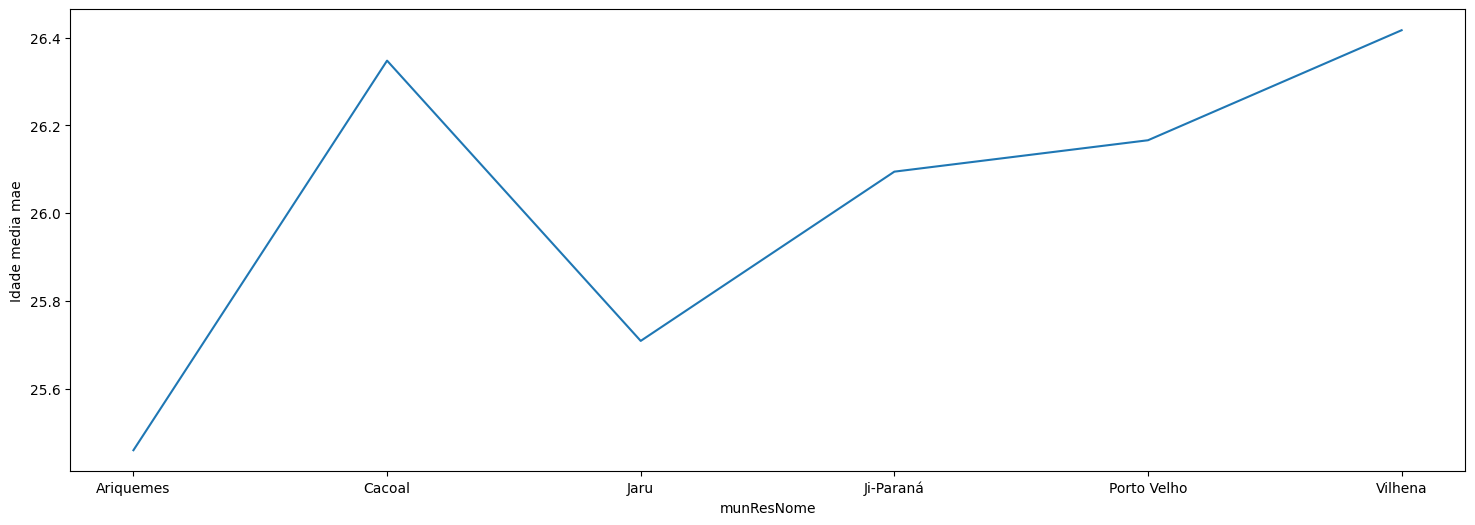

In [38]:
#plotando o grafico 
med_age_mae = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean()
med_age_mae.plot(figsize=[18,6])
plt.ylabel('Idade media mae');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [39]:
# As classificaçoes do IDH foram retiradas do link
#                       https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M
# Sendo possivel as classificaçoes de IDH alto, medio e baixo.
IDH = {
    "Alta Floresta D'Oeste" : 'IDH-médio', 
    'Alto Alegre dos Parecis': 'IDH-baixo',
    'Novo Horizonte do Oeste': 'IDH-médio', 
    'Rolim de Moura': 'IDH-alto', 
    "São Felipe D'Oeste": 'IDH-médio',
    'Ariquemes': 'IDH-alto', 
    'Cujubim': 'IDH-médio', 
    'Alto Paraíso': 'IDH-médio', 
    'Monte Negro': 'IDH-médio', 
    'Jaru': 'IDH-médio',
    'Rio Crespo': 'IDH-médio', 
    'Porto Velho': 'IDH-alto', 
    'Cacaulândia': 'IDH-médio', 
    'Itapuã do Oeste': 'IDH-médio',
    'Ji-Paraná': 'IDH-alto', 
    'Buritis': 'IDH-médio', 
    'Vilhena':'IDH-alto', 
    'Vale do Anari':'IDH-baixo',
    'Candeias do Jamari':'IDH-médio', 
    'Costa Marques':'IDH-médio', 
    'Campo Novo de Rondônia':'IDH-baixo',
    "Machadinho D'Oeste": 'IDH-baixo', 
    'Colorado do Oeste': 'IDH-médio', 
    'Nova Mamoré': 'IDH-baixo', 
    'Urupá': 'IDH-médio',
    'Ouro Preto do Oeste': 'IDH-médio', 
    'Corumbiara':'IDH-médio', 
    'São Miguel do Guaporé':'IDH-médio',
    'Governador Jorge Teixeira': 'IDH-baixo', 
    "Santa Luzia D'Oeste":'IDH-médio',
    'Pimenta Bueno': 'IDH-alto', 
    'Mirante da Serra':'IDH-médio', 
    'Cerejeiras':'IDH-médio',
    'Presidente Médici':'IDH-médio',
    'Cacoal': 'IDH-alto',
    'Parecis':'IDH-médio', 
    "Espigão D'Oeste":'IDH-médio',
    'São Francisco do Guaporé':'IDH-médio', 
    'Ministro Andreazza':'IDH-médio',
    "Nova Brasilândia D'Oeste":'IDH-médio', 
    "Alvorada D'Oeste":'IDH-médio',
    'Primavera de Rondônia':'IDH-médio', 
    'Seringueiras':'IDH-baixo',
    'Castanheiras':'IDH-médio', 
    'Chupinguaia':'IDH-médio', 
    'Guajará-Mirim':'IDH-médio',
    'Theobroma':'IDH-baixo',
    'Nova União':'IDH-baixo', 
    'Teixeirópolis':'IDH-médio', 
    'Vale do Paraíso':'IDH-médio',
    'Pimenteiras do Oeste':'IDH-médio',
    'Cabixi':'IDH-médio'   
}

In [55]:
#gerando o agrupamento
df = sinasc_raw.set_index('munResNome')
df.groupby([IDH])[['IDADEMAE','PESO']].agg(['min','mean','max','std'])

IDADEMAE                          PESO                     \
                min       mean max       std  min         mean   max   
munResNome                                                             
IDH-alto         12  26.280332  47  6.415374  292  3245.623791  5720   
IDH-baixo        13  25.326944  46  6.194908  500  3231.456188  5065   
IDH-médio        11  25.884855  53  6.353274  258  3240.847592  5985   

                        
                   std  
munResNome              
IDH-alto    552.210169  
IDH-baixo   539.129681  
IDH-médio   530.688620

<Axes: xlabel='munResNome'>

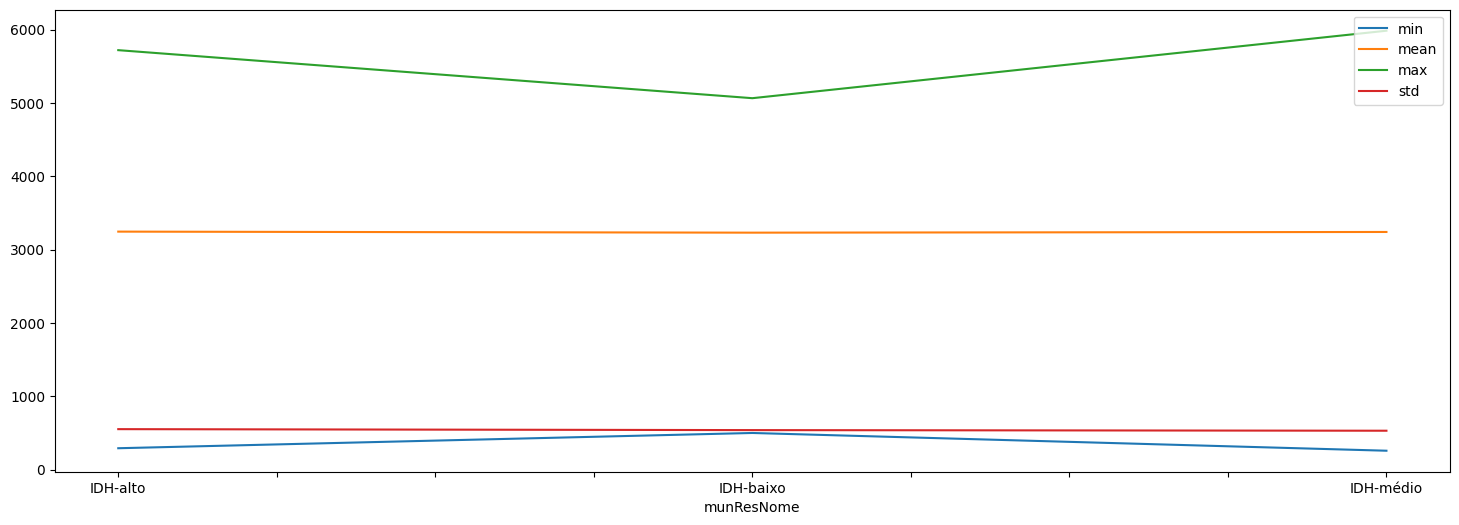

In [68]:
#plotando grafico com base no IDH e o peso
df.groupby([IDH])['PESO'].agg(['min','mean','max','std']).plot(figsize=[18,6])

<Axes: xlabel='munResNome'>

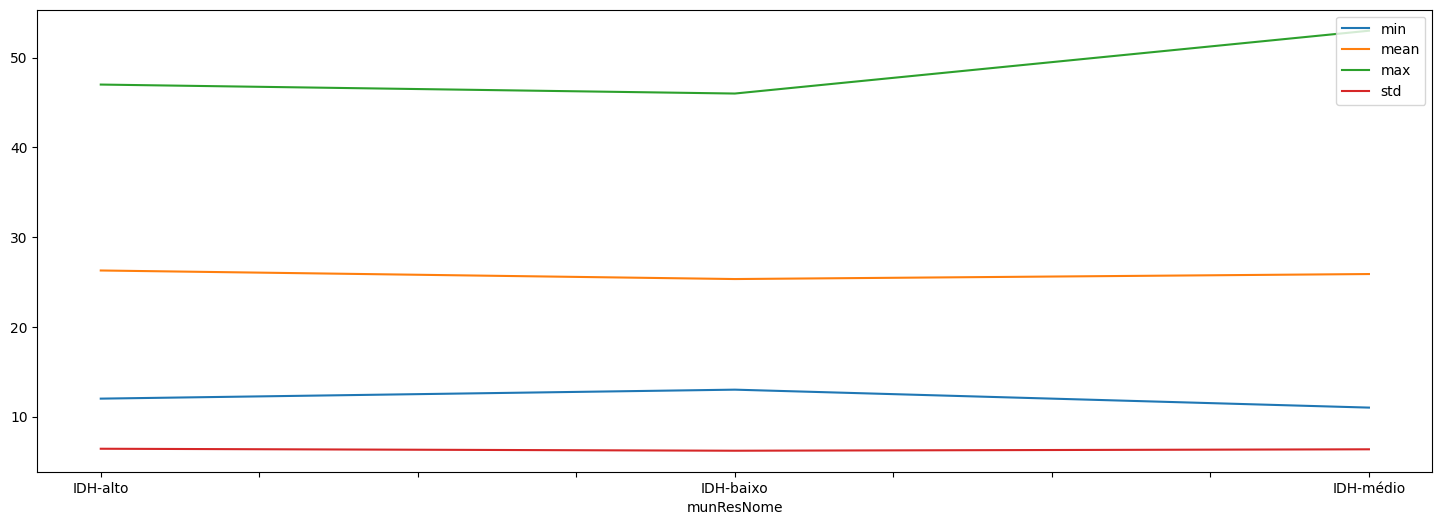

In [67]:
#plotando grafico com base no IDH e a idade da mae
df.groupby([IDH])['IDADEMAE'].agg(['min','mean','max','std']).plot(figsize=[18,6])

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [51]:
# As classificaçoes do IFDM foram retiradas do link
#                       https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM
# Sendo possivel as classificaçoes de IFDM regular, moderado e baixo.
# Nenhum municipio foi classificado com o IFDM baixo.
IFDM = {
    "Espigão d'Oeste":'des_regular',
    'Seringueiras':'des_regular',
    "Alvorada d'Oeste":'des_regular',
    'Itapuã do Oeste':'des_regular',
    'Cabixi':'des_regular',
    'Novo Horizonte do Oeste':'des_regular',
    "Nova Brasilândia d'Oeste":'des_regular',
    'Vale do Paraíso':'des_regular',
    'Corumbiara':'des_regular',
    'Alto Paraíso':'des_regular',
    'Cacaulândia':'des_regular',
    'Vale do Anari':'des_regular',
    'Ministro Andreazza':'des_regular',
    'Costa Marques':'des_regular',
    'Nova União':'des_regular',
    'Guajará-Mirim':'des_regular',
    'Mirante da Serra':'des_regular',
    'Parecis':'des_regular',
    'Castanheiras':'des_regular',
    'Theobroma':'des_regular',
    "Machadinho d'Oeste":'des_regular',
    'Campo Novo de Rondônia':'des_regular',
    'Nova Mamoré':'des_regular',
    'Cujubim':'des_regular',
    'Alto Alegre dos Parecis':'des_regular',
    'Governador Jorge Teixeira': 'des_regular',
    "Ariquemes": 'des_moderado',
    "Vilhena": 'des_moderado',
    "Pimenta Bueno": 'des_moderado',
    "Porto Velho": 'des_moderado',
    "Ji-Paraná": 'des_moderado',
    "Cacoal": 'des_moderado',
    "Santa Luzia d'Oeste": 'des_moderado',
    "Rolim de Moura": 'des_moderado',
    "Chupinguaia": 'des_moderado',
    "São Miguel do Guaporé": 'des_moderado',
    "Pimenteiras do Oeste": 'des_moderado',
    "Teixeirópolis": 'des_moderado',
    "Colorado do Oeste": 'des_moderado',
    "Jaru": 'des_moderado',
    "Rio Crespo": 'des_moderado',
    "Primavera de Rondônia": 'des_moderado',
    "Alta Floresta d'Oeste": 'des_moderado',
    "Ouro Preto do Oeste": 'des_moderado',
    "São Francisco do Guaporé": 'des_moderado',
    "Candeias do Jamari": 'des_moderado',
    "Buritis": 'des_moderado',
    "São Felipe d'Oeste": 'des_moderado',
    "Presidente Médici": 'des_moderado',
    "Cerejeiras": 'des_moderado',
    "Monte Negro": 'des_moderado',
    "Urupá": 'des_moderado',
    
}

In [76]:
# a varivel ESCMAE será analisada uma vez que esse indice está ligado a saude e educaçao.

df1 = sinasc_raw.set_index('munResNome')
df1.groupby([IFDM,'ESCMAE'])[['IDADEMAE','PESO']].agg(['min','mean','max','std'])

IDADEMAE                            PESO  \
                                  min       mean max        std   min   
munResNome   ESCMAE                                                     
des_moderado 1 a 3 anos            12  28.300000  45   7.414918   725   
             12 anos ou mais       16  29.674980  47   5.331550   292   
             4 a 7 anos            12  24.439415  47   6.792650   320   
             8 a 11 anos           12  25.234803  53   6.061338   258   
             Nenhuma               14  30.344828  42   8.090011   350   
des_regular  1 a 3 anos            16  28.951220  44   7.365087  1060   
             12 anos ou mais       17  28.716186  43   5.538887   425   
             4 a 7 anos            11  25.036802  42   6.838854   875   
             8 a 11 anos           13  24.717504  46   6.020188   460   
             Nenhuma               20  35.000000  52  10.902162  2255   

                                                             
                                     mean   max         std  
munResNome   ESCMAE                                          
des_moderado 1 a 3 anos       3157.363158  4570  606.313011  
             12 anos ou mais  3251.468825  5480  551.473030  
             4 a 7 anos       3221.141411  5720  564.059647  
             8 a 11 anos      3251.587254  5060  537.509111  
             Nenhuma          3060.413793  4215  665.191407  
des_regular  1 a 3 anos       3243.707317  4160  531.765438  
             12 anos ou mais  3251.181818  4940  586.318880  
             4 a 7 anos       3242.895939  4785  496.019615  
             8 a 11 anos      3262.029029  5070  508.773263  
             Nenhuma          3126.250000  3845  551.204849

<Axes: xlabel='ESCMAE'>

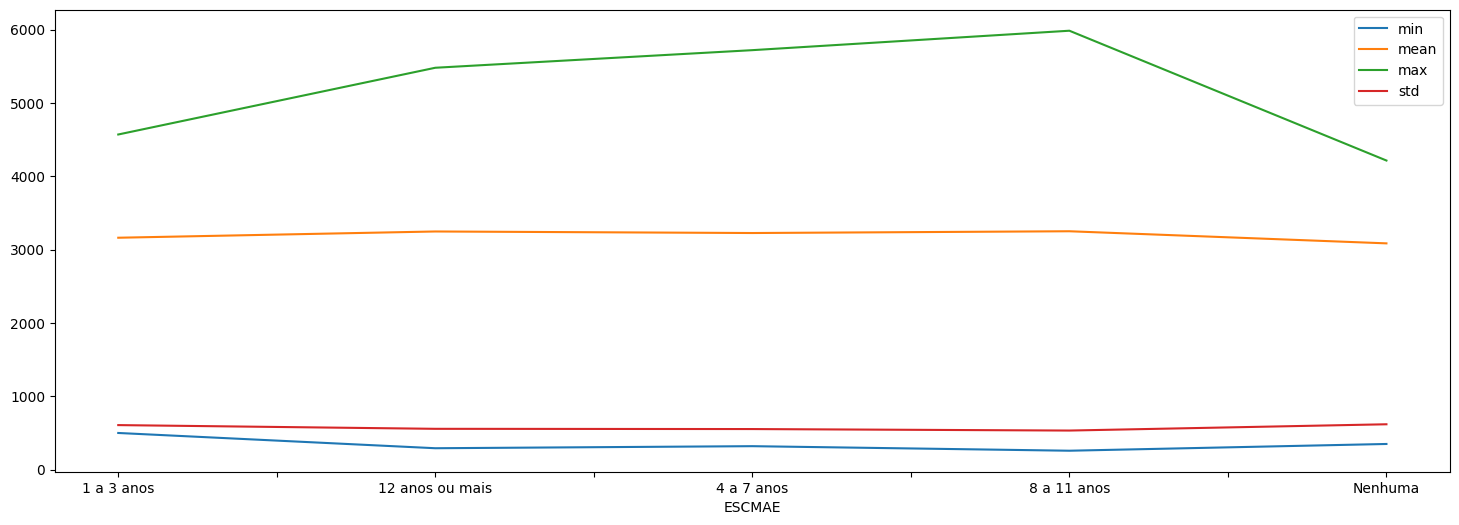

In [83]:
#plotando o grafico em relacao a escolaridade da mae e o peso do bebe
df1.groupby(['ESCMAE'])['PESO'].agg(['min','mean','max','std']).plot(figsize=[18,6])

<Axes: xlabel='munResNome,ESCMAE'>

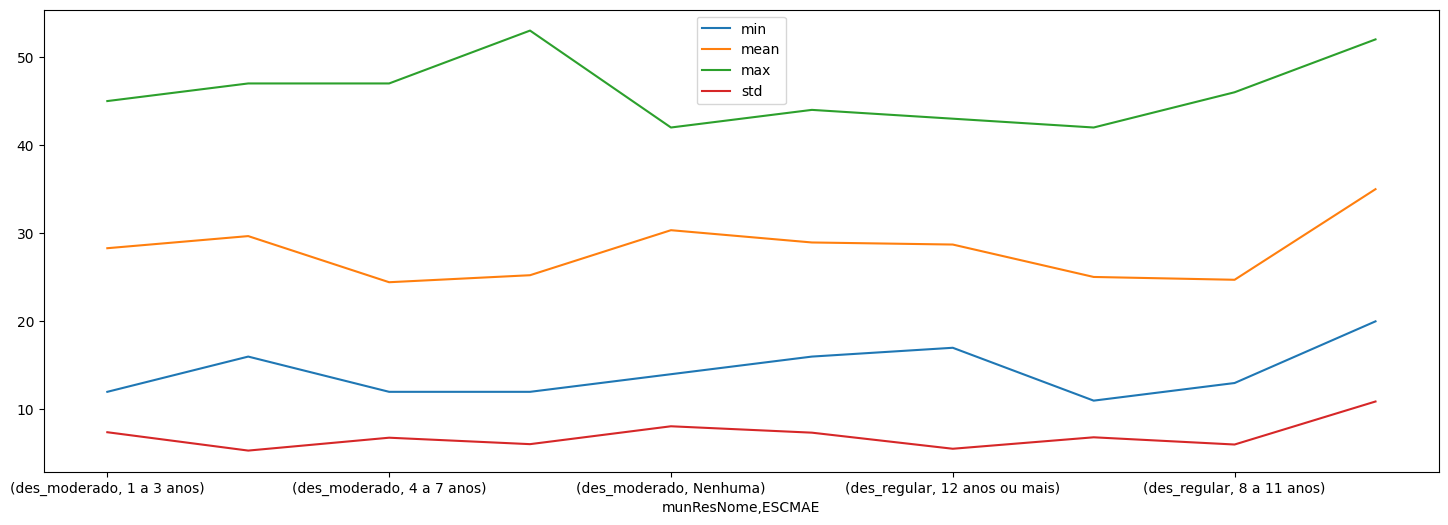

In [89]:
#plotando o grafico em relaçao a idade da mae e o IFDM
df1.groupby([IFDM,'ESCMAE'])['IDADEMAE'].agg(['min','mean','max','std']).plot(figsize=[18,6])

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [57]:
# As classificaçoes do PIB foram retiradas do link
#                        https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB
# Sendo possivel as classificaçoes de PIB: Até 100 milhoes, acima de 100 milhoes,acima de 200 milhoes, 
#                                         acima de 300 milhoes, acima de 500 milhoes, acima de 1 Bilhao.
# Nenhum municipio foi classificado com o IFDM baixo.
PIB = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [58]:
df2 = sinasc_raw.set_index('munResNome')
df2.groupby([PIB])[['IDADEMAE','PESO']].agg(['min','mean','max','std'])

IDADEMAE                          PESO               \
                          min       mean max       std  min         mean   
munResNome                                                                 
Acima de 1 bilhão          12  26.265562  47  6.403777  292  3247.215719   
Acima de 100 Milhões       12  25.638424  52  6.324801  425  3250.392337   
Acima de 200 Milhões       13  25.146435  41  5.905771  930  3233.701349   
Acima de 300 Milhões       11  25.706070  47  6.344987  258  3240.387380   
Acima de 500 Milhões       13  25.785927  53  6.479551  285  3243.336315   
Até 100 Milhões            14  26.519894  41  5.877767  320  3197.679045   

                                        
                       max         std  
munResNome                              
Acima de 1 bilhão     5720  550.349000  
Acima de 100 Milhões  4810  525.017425  
Acima de 200 Milhões  4680  505.558304  
Acima de 300 Milhões  4888  522.024944  
Acima de 500 Milhões  5135  533.249212  
Até 100 Milhões       4505  542.968491

<Axes: xlabel='munResNome'>

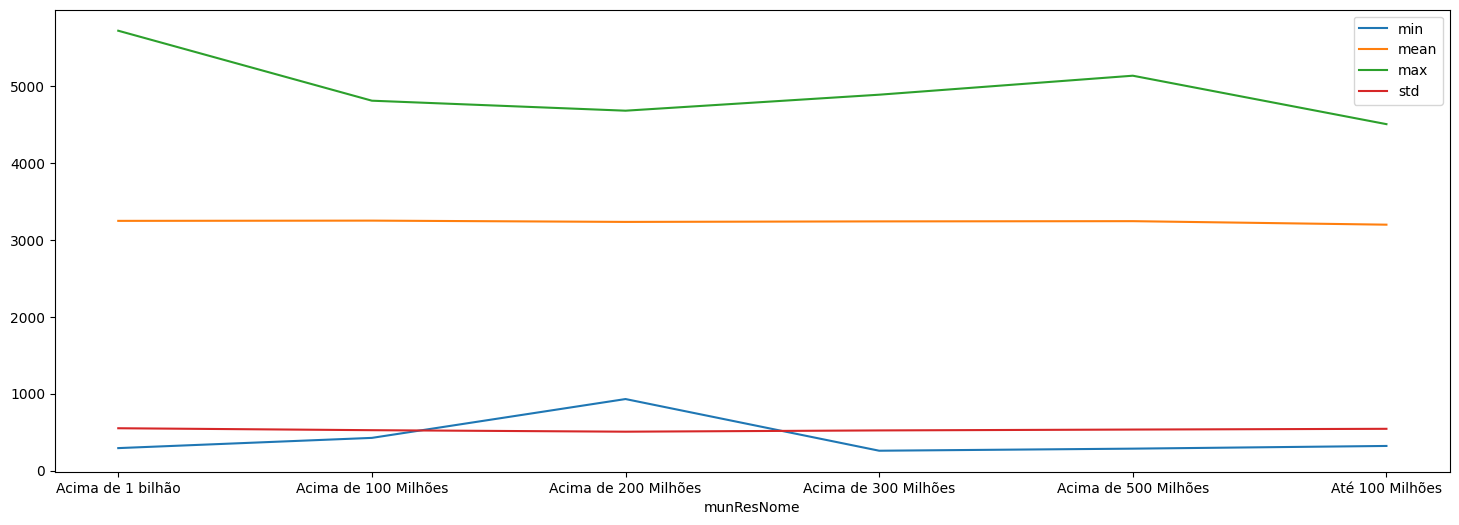

In [90]:
#Graficos
df2.groupby([PIB])['PESO'].agg(['min','mean','max','std']).plot(figsize=[18,6])

<Axes: xlabel='munResNome'>

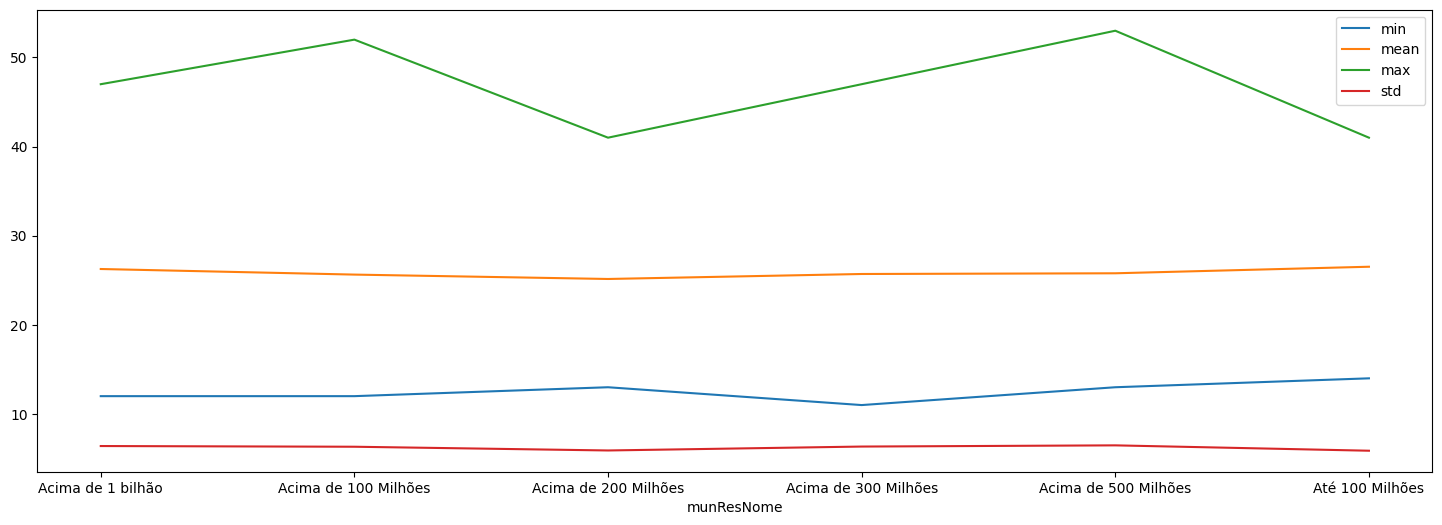

In [91]:
#Graficos
df2.groupby([PIB])['IDADEMAE'].agg(['min','mean','max','std']).plot(figsize=[18,6])

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

**#INSIGHTS**

Sobre o IDH é possivel notar que tanto o peso dos Bebes quanto a idade das maes diminuem a medida que o IDH se torna baixo. Logo podemos analisar que nos municipios com IDH baixo, os bebes nascem mais magros, aumentando a probalidade de alguma complicaçao durante o nascimento.
Uma das variaveis para determinar o IDH é a expectativa de vida ao nascer, logo os graficos mostram que essa informaçao está coerente.

Como o IFDM é um indice que tem como a saude e educaçao como indicadores separados, foi analiasado o peso dos bebes ao nascer e a escolaridade da mae. Pelos dados coletados, foi possivel concluir que a medida que a escolaridade da mae aumenta a probabildiade de nascer bebes mais pesados acompanha,já em relaçao a idade das maes no geral elas tem ficado com uma media de 26 anos nao sendo uma variavel explicativa de algum evento.

Com relaçao ao PIB, mesmo com os graficos e analisando os numeros do DataFrame, tanto as idades das maes, quanto os peso sao bastante proximos em suas medias, minimos e maximos. Talvez seja necessario explorar outras variaveis para ter uma conclusao mais precisa.